In [1]:
##When have surges happened of new hosts coming onto airbnb? 
##When was the big boom/discovery of airbnb?
##How many properties per host and how much time have they been on the platform? 
##Have superhosts been on the platform longer than other renters/hosts?


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'air_bnb_with_edits.xlsx'
df = pd.read_excel(file_path)

# Inspect the first few rows of the data
df.head()


,id,name,host_id,host_name,host_since,host_is_superhost,host_identity_verified,instant_bookable,State,neighbourhood_group,...,outdoor,smart_home_and_security,ac,heating,Outdoor Amenities,Entertainment,Kitchen and Dining,Safety and Security,Laundry Services,Child-Friendly Amenities
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,2008-06-27,f,t,f,California,Los Angeles,...,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2708,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,3008,Chas.,2008-09-16,t,t,t,California,Los Angeles,...,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,2732,Zen Life at the Beach,3041,Yoga Priestess,2008-09-17,f,t,f,California,Los Angeles,...,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,2008-09-25,f,t,t,California,Los Angeles,...,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,2009-05-03,t,t,f,California,Los Angeles,...,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


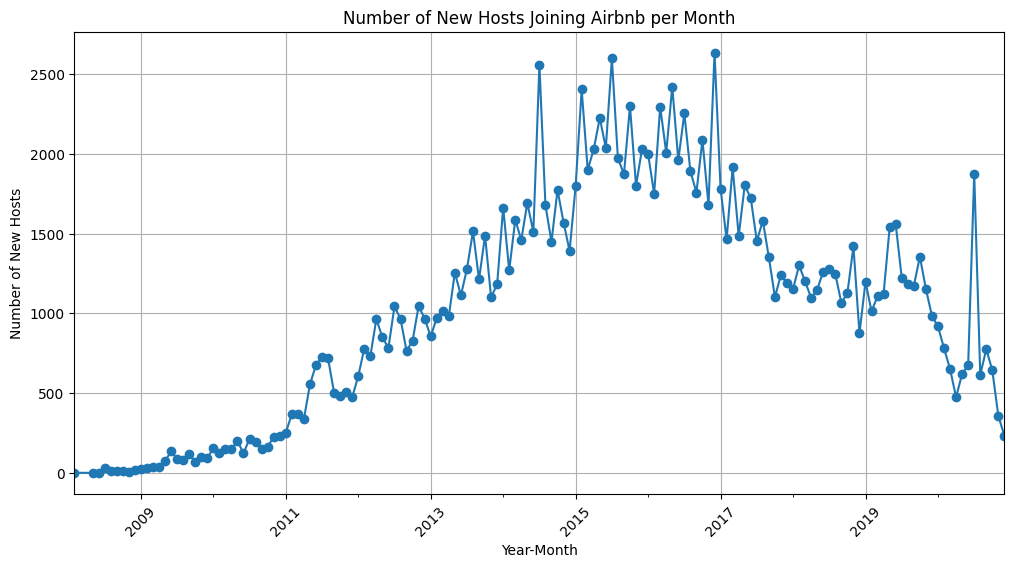

In [4]:
# Convert the 'host_since' column to datetime if it's not already
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# Extract year and month to analyze new hosts over time
df['year_month'] = df['host_since'].dt.to_period('M')

# Count the number of new hosts per month
new_hosts = df.groupby('year_month').size()

# Plot the number of new hosts per month
plt.figure(figsize=(12, 6))
new_hosts.plot(kind='line', marker='o')
plt.title('Number of New Hosts Joining Airbnb per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Hosts')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

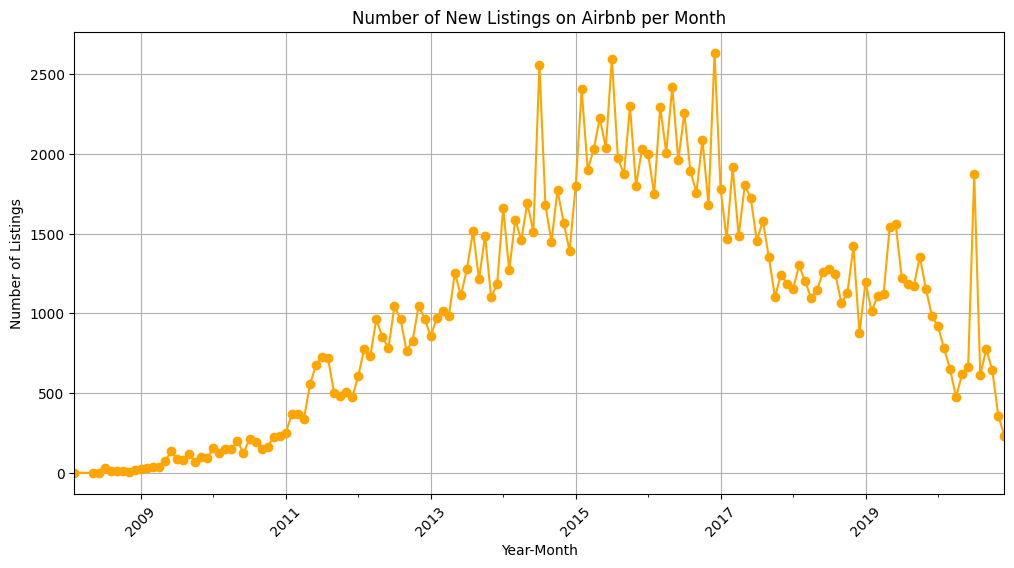

In [5]:
# Count the number of properties listed per month
new_listings = df.groupby('year_month')['id'].nunique()

# Plot the number of new listings per month
plt.figure(figsize=(12, 6))
new_listings.plot(kind='line', marker='o', color='orange')
plt.title('Number of New Listings on Airbnb per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [6]:
# Calculate the number of properties per host
properties_per_host = df.groupby('host_id')['id'].nunique()

# Calculate how long each host has been on the platform
df['host_duration'] = (pd.to_datetime('today') - df['host_since']).dt.days

# Merge the host duration with the number of properties per host
host_analysis = pd.DataFrame({
    'num_properties': properties_per_host,
    'host_duration': df.groupby('host_id')['host_duration'].max()
}).reset_index()

# Display some basic stats on host properties and durations
host_analysis.describe()


,host_id,num_properties,host_duration
count,8.608900e+04,86089.000000,86065.000000
mean,9.123782e+07,1.838028,3286.686307
std,1.008876e+08,7.425272,899.010511
min,4.700000e+02,1.000000,1425.000000
25%,1.212853e+07,1.000000,2637.000000
50%,4.698830e+07,1.000000,3300.000000
75%,1.456749e+08,1.000000,3919.000000
max,3.791734e+08,1087.000000,6111.000000


In [8]:
# Check the columns in your dataset
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'host_since', 'host_is_superhost',
       'host_identity_verified', 'instant_bookable', 'State',
       'neighbourhood_group',
       ...
       'ac', 'heating', 'Outdoor Amenities', 'Entertainment',
       'Kitchen and Dining', 'Safety and Security', 'Laundry Services',
       'Child-Friendly Amenities', 'year_month', 'host_duration'],
      dtype='object', length=180)

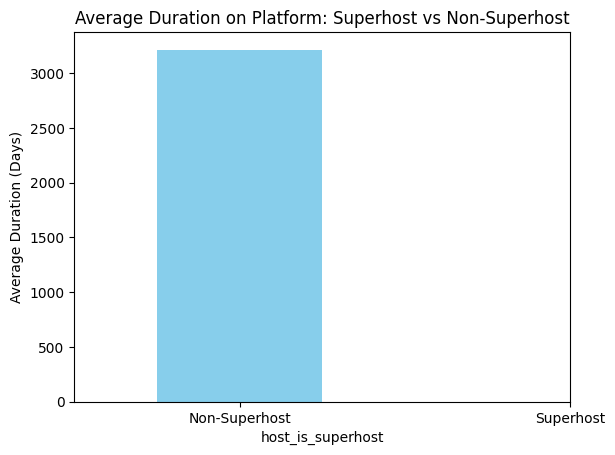

In [9]:
# Convert 'host_is_superhost' to boolean
df['host_is_superhost'] = df['host_is_superhost'].astype(bool)

# Group by superhost status and calculate average time on platform
superhost_duration = df.groupby('host_is_superhost')['host_duration'].mean()

# Plot comparison of host duration by superhost status
superhost_duration.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Duration on Platform: Superhost vs Non-Superhost')
plt.ylabel('Average Duration (Days)')
plt.xticks([0, 1], ['Non-Superhost', 'Superhost'], rotation=0)
plt.show()
